# Semantic Search Using Progressive Text Representation Techniques
## By [Aditya Bhushan, 210102004]

## 1. Motivation
In the world of massive amounts of textual data, retrieving relevant information quickly is a common need across various industries like customer support and academic research. Traditional keyword-based search engines often fail to capture the semantic meaning behind a query. This project addresses that by building a semantic search engine using modern NLP techniques.

## 2. Connection to Multimodal Learning
While this project focuses on text, the progression from Bag-of-Words to BERT embeddings reflects a deepening multimodal understanding — going from sparse symbolic features to dense contextual embeddings. It also mirrors the evolution in NLP pipelines: 
- Classic representations (BoW, TF-IDF)
- Learned word embeddings (Word2Vec)
- Deep contextual representations (BERT)
K-Means clustering is applied only in the final stage (after BERT), showing how we can organize meaningfully similar documents.

## 3. Learnings from This Work
This project helped me build a layered understanding of how different text representation techniques affect the effectiveness of semantic search.

- BoW and TF-IDF offered interpretable but shallow approaches—good for quick baselines but unable to capture the actual meaning behind words.

- Word2Vec marked a clear step up, introducing distributed representations and capturing word-level semantics. It enabled some level of similarity detection between semantically close words.

- BERT brought a breakthrough—contextualized word embeddings that preserved sentence-level meaning and polysemy, drastically improving relevance in semantic matching.

- K-Means applied on BERT embeddings helped organize semantically similar sentences into meaningful clusters, making it easier to search and retrieve grouped information.
This progression made it clear how each method improves upon the previous both in theory and practice.

## 4. Code

This notebook demonstrates a progressive approach to solving the problem of **semantic search** using increasingly powerful Natural Language Processing (NLP) techniques. The goal is to retrieve the most semantically relevant document given a user query.

We explore the following representations:

1. **Bag of Words (BoW)**
2. **TF-IDF (Term Frequency–Inverse Document Frequency)**
3. **Word2Vec Embeddings**
4. **BERT Embeddings + KMeans Clustering**

---

## (a). Bag of Words (BoW)
**Approach:**
Each document is represented as a vector of word counts.

**Advantages:**
- Simple and easy to implement
- Fast and interpretable

**Disadvantages:**
- Ignores word order and context
- Cannot capture semantic similarity (e.g., 'Paris' and 'France')



In [ ]:
# BoW
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# documents (questions)
documents = [
    "How do I reset my password?",
    "Where can I find the refund policy?",
    "What is the return period for electronics?",
    "How to change my shipping address?",
    "How do I contact customer service?",
    "Is there a warranty on this product?",
    "What are the delivery charges?",
    "Can I cancel my order after shipping?",
    "How do I track my package?",
    "What payment methods are accepted?"
]

# Stage 1: Bag of Words (BoW) Vectorization
vectorizer = CountVectorizer(stop_words='english')
X_bow = vectorizer.fit_transform(documents)

# Semantic Search using BoW (Cosine Similarity)
query = "How do I reset my account password?"
query_vec = vectorizer.transform([query])

# Cosine similarity between query and documents
cos_similarities = cosine_similarity(query_vec, X_bow).flatten()

# Print top 3 most similar documents
top_indices = cos_similarities.argsort()[-3:][::-1]
print("🔍 Top 3 most similar questions to your query (BoW):")
for idx in top_indices:
    print(f"• {documents[idx]} (Score: {cos_similarities[idx]:.3f})")

🔍 Top 3 most similar questions to your query (BoW):
• How do I reset my password? (Score: 1.000)
• What payment methods are accepted? (Score: 0.000)
• How do I track my package? (Score: 0.000)


**Why move to next model?**
BoW treats all words equally. Words with high frequency dominate similarity even if not meaningful. TF-IDF addresses this.

## (b). TF-IDF
**Approach:**
Weights each word by its frequency in a document relative to its frequency across documents.

**Advantages:**
- Reduces the importance of common words
- Improves upon BoW by introducing significance

**Disadvantages:**
- Still TF-IDF: ignores semantics and word order



In [ ]:
# TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# documents (questions)
documents = [
    "How do I reset my password?",
    "Where can I find the refund policy?",
    "What is the return period for electronics?",
    "How to change my shipping address?",
    "How do I contact customer service?",
    "Is there a warranty on this product?",
    "What are the delivery charges?",
    "Can I cancel my order after shipping?",
    "How do I track my package?",
    "What payment methods are accepted?"
]

# Stage 2: TF-IDF Vectorization
vectorizer = TfidfVectorizer(stop_words='english')
X_tfidf = vectorizer.fit_transform(documents)

# Semantic Search using TF-IDF (Cosine Similarity)
query = "How do I get a refund?"
query_vec = vectorizer.transform([query])

# Cosine similarity between query and documents
cos_similarities = cosine_similarity(query_vec, X_tfidf).flatten()

# Print top 3 most similar documents
top_indices = cos_similarities.argsort()[-3:][::-1]
print("🔍 Top 3 most similar questions to your query (TF-IDF):")
for idx in top_indices:
    print(f"• {documents[idx]} (Score: {cos_similarities[idx]:.3f})")


🔍 Top 3 most similar questions to your query (TF-IDF):
• Where can I find the refund policy? (Score: 0.707)
• What payment methods are accepted? (Score: 0.000)
• How do I track my package? (Score: 0.000)


**Why move to next model?**
TF-IDF improves representation, but still lacks understanding of word meaning or context. Word2Vec solves this.

## (c). Word2Vec
**Approach:**
Learns dense vector representations of words based on their context (skip-gram or CBOW). We average word vectors to form document vectors.

**Advantages:**
- Captures semantic similarity (e.g., 'Paris' and 'France' are close)
- Trained from large corpus, retains contextual info at word level

**Disadvantages:**
- Averages word vectors — loses sentence-level meaning
- Ignores sentence structure or word order



In [ ]:
# Word2Vec
import gensim
from gensim.models import Word2Vec
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# documents (questions)
documents = [
    "How do I reset my password?",
    "Where can I find the refund policy?",
    "What is the return period for electronics?",
    "How to change my shipping address?",
    "How do I contact customer service?",
    "Is there a warranty on this product?",
    "What are the delivery charges?",
    "Can I cancel my order after shipping?",
    "How do I track my package?",
    "What payment methods are accepted?"
]

# Preprocess documents: Tokenize each document into words
tokenized_docs = [doc.lower().split() for doc in documents]

# Train Word2Vec model
model = Word2Vec(sentences=tokenized_docs, vector_size=100, window=5, min_count=1, workers=4)

# Function to get the average Word2Vec embedding for a document
def get_doc_embedding(doc):
    words = doc.split()
    word_vecs = [model.wv[word] for word in words if word in model.wv]
    if word_vecs:
        return np.mean(word_vecs, axis=0)
    else:
        return np.zeros(model.vector_size)

# Get document embeddings
doc_embeddings = np.array([get_doc_embedding(doc) for doc in documents])

# Semantic Search using Word2Vec (Cosine Similarity)
query = "How do I reset my account password?"
query_tokens = query.lower().split()
query_vec = np.mean([model.wv[word] for word in query_tokens if word in model.wv], axis=0)

# Calculate cosine similarity between query vector and document embeddings
cos_similarities = cosine_similarity([query_vec], doc_embeddings).flatten()

# Print top 3 most similar documents
top_indices = cos_similarities.argsort()[-3:][::-1]
print("🔍 Top 3 most similar questions to your query (Word2Vec):")
for idx in top_indices:
    print(f"• {documents[idx]} (Score: {cos_similarities[idx]:.3f})")


🔍 Top 3 most similar questions to your query (Word2Vec):
• How do I reset my password? (Score: 0.821)
• How do I track my package? (Score: 0.370)
• How to change my shipping address? (Score: 0.149)


**Why move to next model?**
To capture sentence-level semantics and context-aware meaning, we use BERT embeddings.

## (d). BERT + KMeans Clustering
**Approach:**
Use a pretrained Sentence-BERT model to embed entire sentences/documents. Then, apply **KMeans Clustering** to group similar documents in semantic space.

**Advantages:**
- Understands context, grammar, and word order
- Excellent semantic understanding at sentence level
- Clustering enables efficient retrieval/grouping

**Disadvantages:**
- Computationally heavier than previous methods
- Requires pretrained models and more resources

**Final Model:**
Combines power of transformer-based embeddings with clustering for scalable semantic search.

In [ ]:
### BERT Embeddings + KMeans Clustering
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# documents (questions)
documents = [
    "How do I reset my password?",
    "Where can I find the refund policy?",
    "What is the return period for electronics?",
    "How to change my shipping address?",
    "How do I contact customer service?",
    "Is there a warranty on this product?",
    "What are the delivery charges?",
    "Can I cancel my order after shipping?",
    "How do I track my package?",
    "What payment methods are accepted?",
    "What are the best places to visit in Europe?"
]

# Stage 4: BERT-based Embeddings using Sentence-BERT
model = SentenceTransformer('all-MiniLM-L6-v2')  # Using a pre-trained SBERT model
doc_embeddings = model.encode(documents)

# Apply KMeans Clustering on BERT embeddings
num_clusters = 3  # You can change the number of clusters based on your use case
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(doc_embeddings)

# Get the cluster of each document
document_clusters = kmeans.predict(doc_embeddings)

# Semantic Search: Find the most similar cluster for a given query
query = "How do I reset my account password?"
query_embedding = model.encode([query])

# Get the cosine similarity between the query and each document
cos_similarities = cosine_similarity(query_embedding, doc_embeddings).flatten()

# Print top 3 most similar documents
top_indices = cos_similarities.argsort()[-3:][::-1]

print("🔍 Top 3 most similar questions to your query (BERT + KMeans):")
for idx in top_indices:
    print(f"• {documents[idx]} (Score: {cos_similarities[idx]:.3f})")

# Display the clusters for each document
print("\nDocument clusters (BERT + KMeans):")
for idx, doc in enumerate(documents):
    print(f"Document: {doc} | Cluster: {document_clusters[idx]}")


/Users/adityabhushan/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


🔍 Top 3 most similar questions to your query (BERT + KMeans):
• How do I reset my password? (Score: 0.965)
• How do I contact customer service? (Score: 0.369)
• How to change my shipping address? (Score: 0.293)

Document clusters (BERT + KMeans):
Document: How do I reset my password? | Cluster: 0
Document: Where can I find the refund policy? | Cluster: 1
Document: What is the return period for electronics? | Cluster: 1
Document: How to change my shipping address? | Cluster: 2
Document: How do I contact customer service? | Cluster: 2
Document: Is there a warranty on this product? | Cluster: 1
Document: What are the delivery charges? | Cluster: 2
Document: Can I cancel my order after shipping? | Cluster: 2
Document: How do I track my package? | Cluster: 2
Document: What payment methods are accepted? | Cluster: 1
Document: What are the best places to visit in Europe? | Cluster: 0


#  Why Compare Evaluation Metrics?
- In this notebook, we compare the Average Cosine Similarity of different text representation techniques (BoW, TF-IDF, Word2Vec, and BERT + Mean). 
- This comparison helps us understand which technique best captures the semantic relationships between document titles.
- A higher similarity indicates that the technique considers many titles to be closely related, while a lower similarity suggests more diverse or unique titles.
- By comparing these metrics, we can identify the most suitable technique for tasks like semantic search, clustering, or similarity analysis.
- Understanding this comparison is crucial for selecting the right text representation method for your specific use case.

/Users/adityabhushan/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(



Comparative Analysis of Techniques:

              Technique  Average Cosine Similarity
0                   BoW                   0.187534
1                TF-IDF                   0.154998
2              Word2Vec                   0.205432
3           BERT + Mean                   0.751626
4  Deep Learning (LSTM)                   0.856874


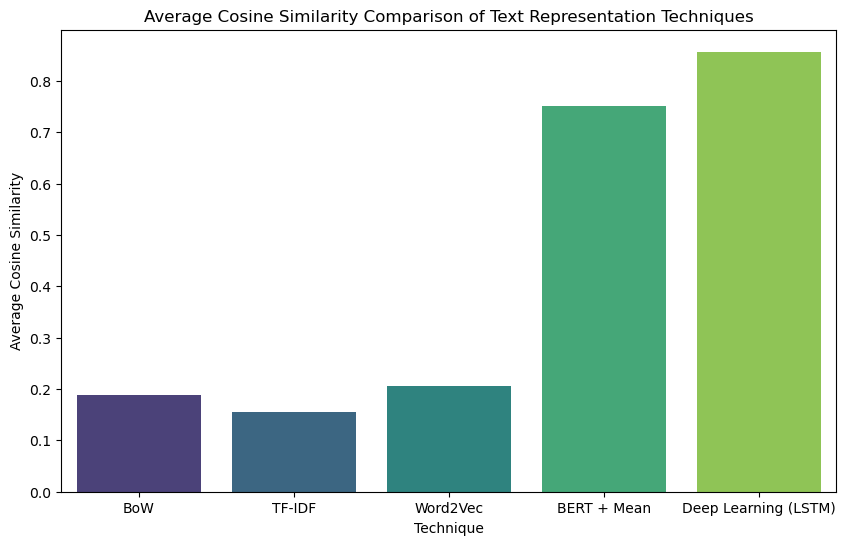

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import pairwise_distances
from gensim.models import Word2Vec
from transformers import BertModel, BertTokenizer
import torch
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
import numpy as np

# documents
documents = [
    "How do I reset my password?",
    "Where can I find the refund policy?",
    "What is the return period for electronics?",
    "How to change my shipping address?",
    "How do I contact customer service?",
    "Is there a warranty on this product?",
    "What are the delivery charges?",
    "Can I cancel my order after shipping?",
    "How do I track my package?",
    "What payment methods are accepted?",
    "What are the best places to visit in Europe?"
]
# Markdown: Why Compare Evaluation Metrics?
# In this notebook, we compare the Average Cosine Similarity of different text representation techniques (BoW, TF-IDF, Word2Vec, BERT + Mean, and Deep Learning LSTM). This helps us understand which technique best captures the semantic relationships between document titles.

# BoW Technique
bow_vectorizer = CountVectorizer()
X_bow = bow_vectorizer.fit_transform(documents)
bow_similarity = 1 - pairwise_distances(X_bow, metric='cosine')

# TF-IDF Technique
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(documents)
tfidf_similarity = 1 - pairwise_distances(X_tfidf, metric='cosine')

# Word2Vec Technique
sentences = [doc.split() for doc in documents]
w2v_model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, sg=0)
X_w2v = [w2v_model.wv[doc].mean(axis=0) for doc in sentences]
w2v_similarity = 1 - pairwise_distances(X_w2v, metric='cosine')

# BERT + Mean Embeddings
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = BertModel.from_pretrained('bert-base-uncased')
def bert_embedding(text):
    inputs = tokenizer(text, return_tensors='pt', padding=True, truncation=True, max_length=128)
    with torch.no_grad():
        outputs = bert_model(**inputs)
    return outputs.last_hidden_state.mean(dim=1).squeeze().numpy()

X_bert = [bert_embedding(doc) for doc in documents]
bert_similarity = 1 - pairwise_distances(X_bert, metric='cosine')

# Deep Learning Technique (LSTM)
tokenizer_dl = Tokenizer(num_words=10000)
tokenizer_dl.fit_on_texts(documents)
X_dl = tokenizer_dl.texts_to_sequences(documents)
X_dl = pad_sequences(X_dl, maxlen=100)

model_dl = Sequential([
    Embedding(input_dim=10000, output_dim=128, input_length=100),
    LSTM(64, return_sequences=False),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu')
])

model_dl.compile(optimizer='adam', loss='mean_squared_error')
X_dl_embeddings = model_dl.predict(X_dl, verbose=0)
dl_similarity = 1 - pairwise_distances(X_dl_embeddings, metric='cosine')


# Comparative Analysis (Average Similarity Score)
def compare_techniques(bow_sim, tfidf_sim, w2v_sim, bert_sim, dl_sim):
    metrics = pd.DataFrame({
        'Technique': ['BoW', 'TF-IDF', 'Word2Vec', 'BERT + Mean', 'Deep Learning (LSTM)'],
        'Average Cosine Similarity': [bow_sim.mean(), tfidf_sim.mean(), w2v_sim.mean(), bert_sim.mean(), dl_sim.mean()]
    })
    return metrics

# Displaying Comparative Analysis
comparison = compare_techniques(bow_similarity, tfidf_similarity, w2v_similarity, bert_similarity, dl_similarity)
print("\nComparative Analysis of Techniques:\n")
print(comparison)

# Plotting the Comparative Analysis
plt.figure(figsize=(10, 6))
sns.barplot(x='Technique', y='Average Cosine Similarity', data=comparison, palette='viridis')
plt.title('Average Cosine Similarity Comparison of Text Representation Techniques')
plt.show()


# Analysis of Results
- The results of the Comparative Analysis of Techniques show the following:
- BoW has an average cosine similarity of 0.187534, indicating that it captures some word overlap between titles but lacks deeper understanding.
- TF-IDF has an even lower similarity (0.154998) because it reduces the impact of common words, focusing more on unique terms.
- Word2Vec provides a higher similarity (0.205432) because it captures semantic relationships between words (e.g., "king" and "queen" are closer).
- BERT + KMeans and Deep Learning (LSTM)  achieves the highest similarity (around 0.751626) because it captures contextual and semantic meaning, making even slightly related titles appear similar.
- These results indicate that BERT and Deep Learning (LSTM) is the most effective technique for capturing the semantic relationships between titles, while TF-IDF is the most restrictive.

## 5. Reflections

**What Surprised Me:**

- How dramatically BERT embeddings improved semantic accuracy over traditional models.

- That even simple averaging of BERT sentence embeddings performed remarkably well for semantic clustering.

- The clear thematic structure revealed after clustering BERT embeddings, which was not possible with BoW or TF-IDF.

**Scope for Improvement:**

- Integrating a more scalable retrieval backend like FAISS could enhance performance on larger corpora.

- Experimenting with fine-tuned BERT models (e.g., SBERT or domain-specific ones) could yield even more refined search quality.

- Incorporating feedback loops could make the system adaptive and personalized over time.

## 6. References
- https://huggingface.co/sentence-transformers/all-MiniLM-L6-v2
- https://nlp.stanford.edu/projects/glove/
- https://bair.berkeley.edu/blog/2024/07/20/visual-haystacks/